### Classification of lower-case Greek letters 

Authors: Katiana Kontolati and Rahul Meena,
/PhD candidates, Johns Hopkins University

For more information on the dataset visit: https://www.kaggle.com/katianakontolati/classification-of-handwritten-greek-letters

In [1]:
%pylab inline
from PIL import Image
import matplotlib.image as image
from matplotlib import pyplot as plt
from numpy import asarray
import os 

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings(action="ignore")

### Training dataset

The training dataset consists of 240 images of all the 24 letters in the Greek alphabet (10 for each letter)

In [3]:
# Training dataset
data_train = genfromtxt('Handwritten-Greek-letters/train.csv',delimiter=',') # change to your directory
X = data_train[:,0:196]
print(X.shape)

# letter list
letters = ['alpha','beta','gamma','delta','epsilon','zeta','eta','theta','yiota',
     'kappa','lambda','mu','nu','ksi','omicron','pi','rho','sigma','tau','ypsilon','phi','chi','psi','omega']

# ground truth
Y = data_train[:,196].reshape((-1,1))
print(Y.shape)

(240, 196)
(240, 1)


### Test dataset

The test dataset comsists of 96 pictures of 24 Greek letter (4 for each letter)

In [4]:
# Test dataset
data_train = genfromtxt('Handwritten-Greek-letters/test.csv',delimiter=',') # change to your directory
X_test = data_train[:,0:196]
print(X_test.shape)

# ground truth
Y_test = data_train[:,196].reshape((-1,1))
print(Y_test.shape)

(96, 196)
(96, 1)


In [5]:
# pre-processing : scale the data
from sklearn import preprocessing

# Training data
X_scaled = preprocessing.scale(X)

# Testing data
X_test_scaled = preprocessing.scale(X_test)

# Classification

### Neural Network

Since the evaluation of the classifier on the training dataset causes some optimism bias, here we have as a accuracy measure the difference between the prediction of the classifier on the test dataset and the ground truth of the test dataset

In [6]:
np.random.seed(4502)

from sklearn.neural_network import MLPClassifier
Y = Y.ravel()
Y_test = Y_test.ravel()
clf = MLPClassifier(hidden_layer_sizes=(300,), activation='identity', solver='lbfgs', max_iter=200)
pred = clf.fit(X_scaled,Y.ravel()).predict(X_test_scaled)
print('Number of mislabeled data is {} out of 96'.format((pred!=Y_test).sum()))

# Cross-validation on the training dataset
accuracy = cross_val_score(clf, X_scaled, Y, cv=7) 
print('For the Neural Network the accuracy from Cross Validation is:', accuracy.mean() * 100)

Number of mislabeled data is 9 out of 96
For the Neural Network the accuracy from Cross Validation is: 88.73949579831934


In [7]:
# compute confusion matrix for 1-NN
from sklearn.metrics import confusion_matrix

y_true = Y_test

clf = MLPClassifier(hidden_layer_sizes=(300,), activation='identity', solver='lbfgs', max_iter=200)
y_pred = clf.fit(X_scaled,Y.ravel()).predict(X_test_scaled)

CONF = confusion_matrix(y_true, y_pred)

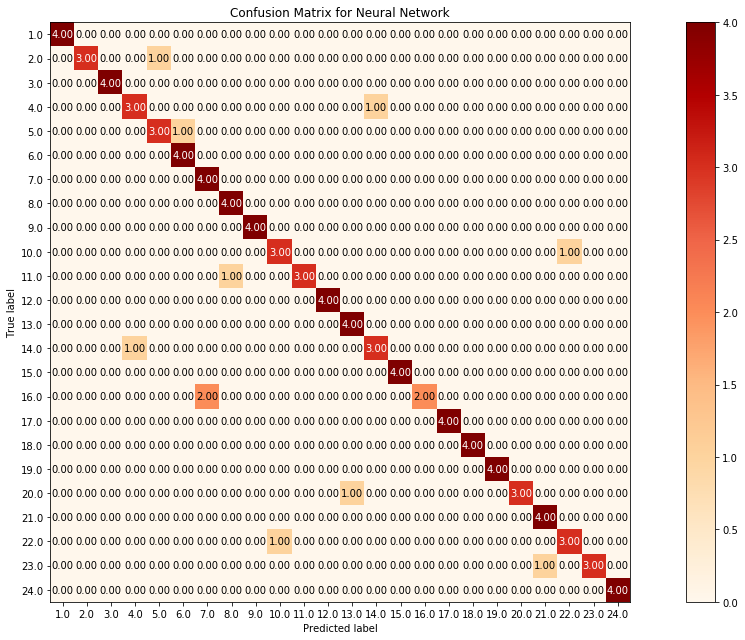

In [8]:
fig, ax = plt.subplots(figsize=(16, 9)) 
im = ax.imshow(CONF, interpolation='nearest', cmap="OrRd")
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(CONF.shape[1]),
yticks=np.arange(CONF.shape[0]),
# ... and label them with the respective list entries
xticklabels=np.unique(Y), yticklabels=np.unique(Y),
title='Confusion Matrix for Neural Network',
ylabel='True label',
xlabel='Predicted label')

fmt = '.2f' if True else 'd'
thresh = CONF.max() / 2.
for i in range(CONF.shape[0]):
    for j in range(CONF.shape[1]):
        ax.text(j, i, format(CONF[i, j], fmt),
                ha="center", va="center",
                color="white" if CONF[i, j] > thresh else "black")
fig.tight_layout()

### k-Nearest Neighbors

In [9]:
# k-NN - no scaling for k-NN, it works better without
for k in range(1,10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    prediction = knn.fit(X,Y).predict(X_test)
    print('Number of mislabeled data is:',(prediction!=Y_test).sum())
    accuracy = cross_val_score(knn, X, Y, cv=10) 
    print('For {}-Nearest Neighbors accuracy is:'.format(k), accuracy.mean() * 100)

Number of mislabeled data is: 8
For 1-Nearest Neighbors accuracy is: 91.66666666666666
Number of mislabeled data is: 12
For 2-Nearest Neighbors accuracy is: 90.83333333333334
Number of mislabeled data is: 10
For 3-Nearest Neighbors accuracy is: 89.16666666666669
Number of mislabeled data is: 15
For 4-Nearest Neighbors accuracy is: 90.41666666666669
Number of mislabeled data is: 9
For 5-Nearest Neighbors accuracy is: 88.75
Number of mislabeled data is: 8
For 6-Nearest Neighbors accuracy is: 86.25
Number of mislabeled data is: 10
For 7-Nearest Neighbors accuracy is: 86.25
Number of mislabeled data is: 11
For 8-Nearest Neighbors accuracy is: 85.41666666666666
Number of mislabeled data is: 12
For 9-Nearest Neighbors accuracy is: 86.25


In [10]:
# compute confusion matrix for 1-NN
y_true = Y_test

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
y_pred2 = knn.fit(X,Y).predict(X_test)

CONF = confusion_matrix(y_true, y_pred2)

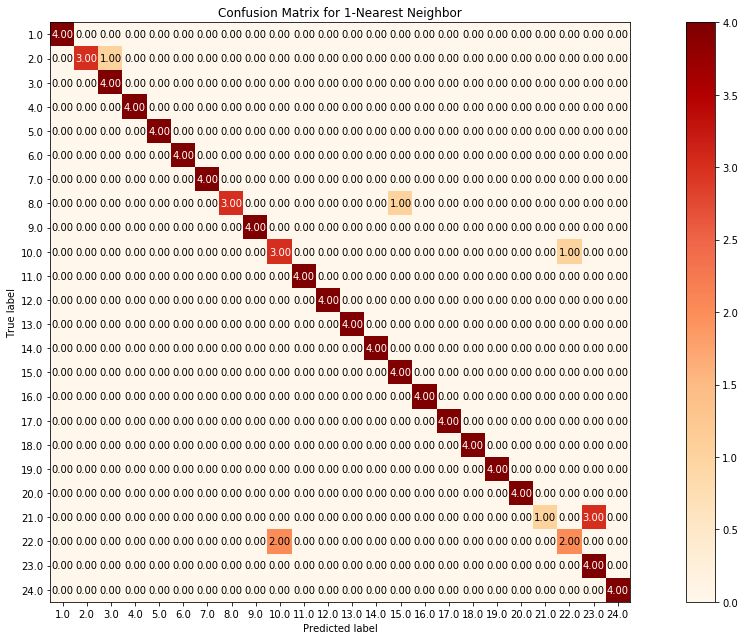

In [11]:
fig, ax = plt.subplots(figsize=(16, 9)) 
im = ax.imshow(CONF, interpolation='nearest', cmap="OrRd")
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(CONF.shape[1]),
yticks=np.arange(CONF.shape[0]),
# ... and label them with the respective list entries
xticklabels=np.unique(Y), yticklabels=np.unique(Y),
title='Confusion Matrix for 1-Nearest Neighbor',
ylabel='True label',
xlabel='Predicted label')

fmt = '.2f' if True else 'd'
thresh = CONF.max() / 2.
for i in range(CONF.shape[0]):
    for j in range(CONF.shape[1]):
        ax.text(j, i, format(CONF[i, j], fmt),
                ha="center", va="center",
                color="white" if CONF[i, j] > thresh else "black")
fig.tight_layout()

### Random Forest

In [12]:
# Random Forest classifier
maxdepth = np.array([3 ,4,5 ,6,7,8 ,9,10,11, 12, 14, 20,30,40,50,100])  # maximum depth of the tree
n_est = 100  # number of trees in the forest
np.random.seed(5434) 

for i in range(0,maxdepth.shape[0]):
    clf4 = RFC(n_estimators = n_est, max_depth=maxdepth[i],criterion='gini')
    pred4 = clf4.fit(X,Y).predict(X_test)
    print('For maximum depth {} the number of mislabeled data is:'.format(maxdepth[i]),(pred4!=Y_test).sum())

For maximum depth 3 the number of mislabeled data is: 27
For maximum depth 4 the number of mislabeled data is: 21
For maximum depth 5 the number of mislabeled data is: 10
For maximum depth 6 the number of mislabeled data is: 18
For maximum depth 7 the number of mislabeled data is: 16
For maximum depth 8 the number of mislabeled data is: 15
For maximum depth 9 the number of mislabeled data is: 18
For maximum depth 10 the number of mislabeled data is: 19
For maximum depth 11 the number of mislabeled data is: 16
For maximum depth 12 the number of mislabeled data is: 11
For maximum depth 14 the number of mislabeled data is: 14
For maximum depth 20 the number of mislabeled data is: 11
For maximum depth 30 the number of mislabeled data is: 8
For maximum depth 40 the number of mislabeled data is: 16
For maximum depth 50 the number of mislabeled data is: 13
For maximum depth 100 the number of mislabeled data is: 16


#### Note: for both Decision Trees and Random Forest it did not matter if we use the scaled data or not

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

np.random.seed(132)
model = LogisticRegression(C=1e3, solver = 'lbfgs', multi_class = 'multinomial');
# C is Inverse of regularization strength; must be a positive float. 
# Like in support vector machines, smaller values specify stronger regularization. 
pred5 = model.fit(X, Y).predict(X_test)

print('Number of mislabeled data is:',(pred5!=Y_test).sum())

Number of mislabeled data is: 8


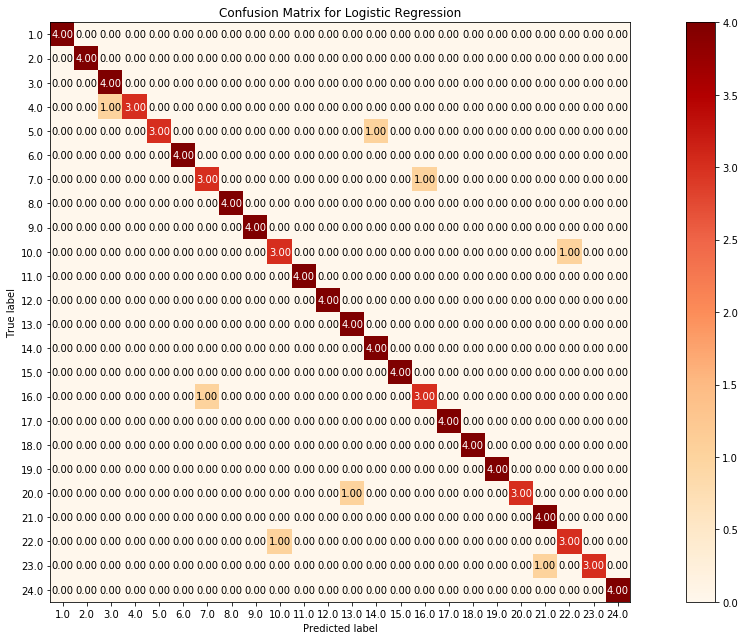

In [14]:
# compute confusion matrix for Logistic Regression
CONF = confusion_matrix(y_true, pred5)

fig, ax = plt.subplots(figsize=(16, 9)) 
im = ax.imshow(CONF, interpolation='nearest', cmap="OrRd")
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(CONF.shape[1]),
yticks=np.arange(CONF.shape[0]),
# ... and label them with the respective list entries
xticklabels=np.unique(Y), yticklabels=np.unique(Y),
title='Confusion Matrix for Logistic Regression',
ylabel='True label',
xlabel='Predicted label')

fmt = '.2f' if True else 'd'
thresh = CONF.max() / 2.
for i in range(CONF.shape[0]):
    for j in range(CONF.shape[1]):
        ax.text(j, i, format(CONF[i, j], fmt),
                ha="center", va="center",
                color="white" if CONF[i, j] > thresh else "black")
fig.tight_layout()

### Other methods

In [15]:
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### GaussianNB

In [16]:
smoothing = np.array([1e-9,1e-7,1e-5,1e-3,1e-1,1,10,100])
#Portion of the largest variance of all features that is added to variances for calculation stability.

for k in range(smoothing.size):
    clf_1 = GaussianNB(priors=None, var_smoothing=smoothing[k])
    y_pred_1 = clf_1.fit(X,Y).predict(X_test)
    print('Number of mislabeled data is:',(y_pred_1!=Y_test).sum())

#Accuracy_CV7
clf_1 = GaussianNB(priors=None, var_smoothing=1)
accuracy = cross_val_score(clf_1, X, Y, cv=7) 
print('For the GaussianNB the maximum accuracy from Cross Validation is:', accuracy.mean() * 100)

Number of mislabeled data is: 33
Number of mislabeled data is: 33
Number of mislabeled data is: 29
Number of mislabeled data is: 21
Number of mislabeled data is: 13
Number of mislabeled data is: 11
Number of mislabeled data is: 16
Number of mislabeled data is: 16
For the GaussianNB the maximum accuracy from Cross Validation is: 86.65066026410565


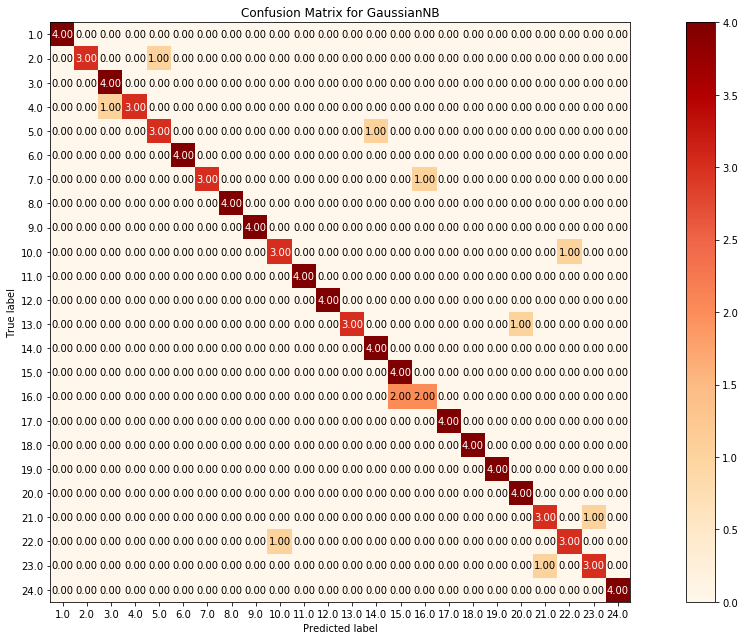

In [17]:
y_pred_1 = clf_1.fit(X,Y).predict(X_test)
CONF = confusion_matrix(y_true, y_pred_1)
fig, ax = plt.subplots(figsize=(16, 9)) 
im = ax.imshow(CONF, interpolation='nearest', cmap="OrRd")
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(CONF.shape[1]),
yticks=np.arange(CONF.shape[0]),
# ... and label them with the respective list entries
xticklabels=np.unique(Y), yticklabels=np.unique(Y),
title='Confusion Matrix for GaussianNB',
ylabel='True label',
xlabel='Predicted label')

fmt = '.2f' if True else 'd'
thresh = CONF.max() / 2.
for i in range(CONF.shape[0]):
    for j in range(CONF.shape[1]):
        ax.text(j, i, format(CONF[i, j], fmt),
                ha="center", va="center",
                color="white" if CONF[i, j] > thresh else "black")
fig.tight_layout()

### AdaBoostClassifier

In [18]:
estimators = np.array([1,5,10,15,20,30,40,50,100,200])
#max depth = 4 works quite good for this example

for k in range(estimators.size):
    clf_2 = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=estimators[k],base_estimator=RandomForestClassifier(max_depth=4, random_state=0))
    y_pred_2 = clf_2.fit(X,Y).predict(X_test)
    print('Number of mislabeled data is:',(y_pred_2!=Y_test).sum())

#Accuracy_CV7
#Since it's using Randomforest, the accuracy(mislabeled data) changes each time we run the code
clf_2 = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=40,base_estimator=RandomForestClassifier(max_depth=4, random_state=0))
accuracy = cross_val_score(clf_2, X, Y, cv=7) 
print('For the GaussianNB the maximum accuracy from Cross Validation is:', accuracy.mean() * 100)

Number of mislabeled data is: 17
Number of mislabeled data is: 15
Number of mislabeled data is: 12
Number of mislabeled data is: 11
Number of mislabeled data is: 14
Number of mislabeled data is: 9
Number of mislabeled data is: 15
Number of mislabeled data is: 11
Number of mislabeled data is: 12
Number of mislabeled data is: 18
For the GaussianNB the maximum accuracy from Cross Validation is: 85.36614645858343


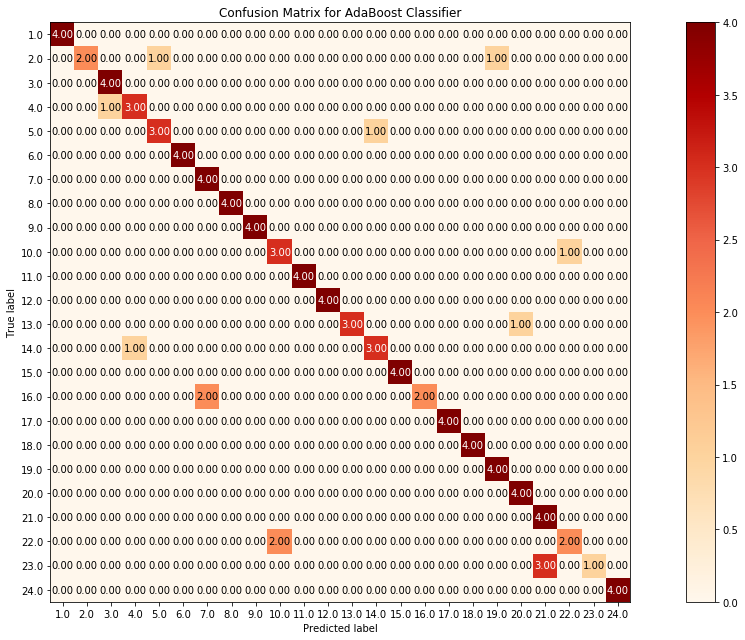

In [19]:
y_pred_2 = clf_2.fit(X,Y).predict(X_test)
CONF = confusion_matrix(y_true, y_pred_2)
fig, ax = plt.subplots(figsize=(16, 9)) 
im = ax.imshow(CONF, interpolation='nearest', cmap="OrRd")
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(CONF.shape[1]),
yticks=np.arange(CONF.shape[0]),
# ... and label them with the respective list entries
xticklabels=np.unique(Y), yticklabels=np.unique(Y),
title='Confusion Matrix for AdaBoost Classifier',
ylabel='True label',
xlabel='Predicted label')

fmt = '.2f' if True else 'd'
thresh = CONF.max() / 2.
for i in range(CONF.shape[0]):
    for j in range(CONF.shape[1]):
        ax.text(j, i, format(CONF[i, j], fmt),
                ha="center", va="center",
                color="white" if CONF[i, j] > thresh else "black")
fig.tight_layout()

### SVC(C-Support Vector Classification)

In [20]:
C1 = ['linear','poly','rbf','sigmoid']
#Portion of the largest variance of all features that is added to variances for calculation stability.

for k in C1:
    clf_3 = SVC(kernel=k, C=1)
    y_pred_3 = clf_3.fit(X,Y).predict(X_test)
    print('Number of mislabeled data is:',(y_pred_3!=Y_test).sum())
    
#Accuracy_CV7
clf_3 = SVC(kernel='linear', C=1)
accuracy = cross_val_score(clf_3, X, Y, cv=7) 
print('For the GaussianNB the maximum accuracy from Cross Validation is:', accuracy.mean() * 100)

Number of mislabeled data is: 7
Number of mislabeled data is: 9
Number of mislabeled data is: 9
Number of mislabeled data is: 45
For the GaussianNB the maximum accuracy from Cross Validation is: 90.84033613445378


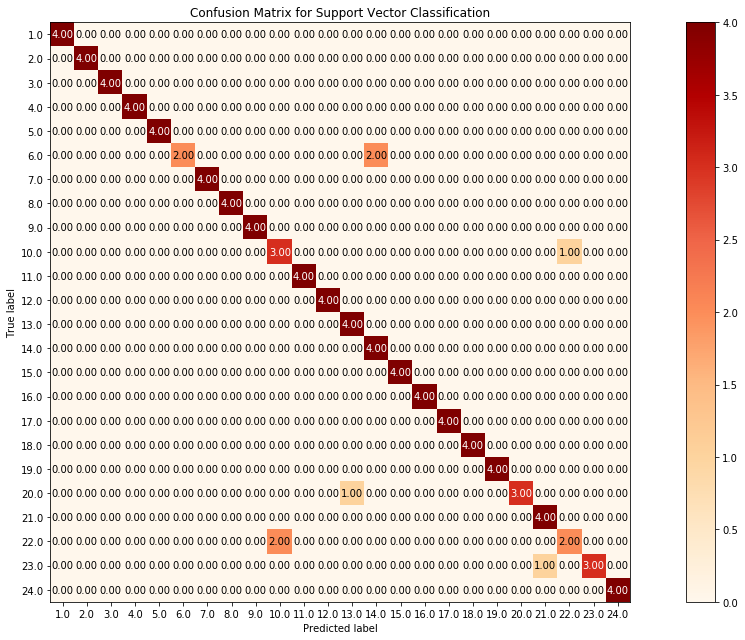

In [21]:
y_pred_3 = clf_3.fit(X,Y).predict(X_test)
CONF = confusion_matrix(y_true, y_pred_3)
fig, ax = plt.subplots(figsize=(16, 9)) 
im = ax.imshow(CONF, interpolation='nearest', cmap="OrRd")
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(CONF.shape[1]),
yticks=np.arange(CONF.shape[0]),
# ... and label them with the respective list entries
xticklabels=np.unique(Y), yticklabels=np.unique(Y),
title='Confusion Matrix for Support Vector Classification',
ylabel='True label',
xlabel='Predicted label')

fmt = '.2f' if True else 'd'
thresh = CONF.max() / 2.
for i in range(CONF.shape[0]):
    for j in range(CONF.shape[1]):
        ax.text(j, i, format(CONF[i, j], fmt),
                ha="center", va="center",
                color="white" if CONF[i, j] > thresh else "black")
fig.tight_layout()

**Conclusions**

>* The best classifiers are the 1-NN, Random Forest, Logistic Regression classifier and Support Vector Classification

>* In Support Vector Classification we got 7 mislabled points and in other three cases we were able to get only 8 mislabeled data out of the 96 which corresponds to a 92.7 and 91.7% success respectively

>* Given the large number of labels (24) and the relatively small training dataset (240 images) this is a very good result

>* Most of the mistakes were 'chi' falsely labeled as 'kappa' and vice versa, 'phi' mislabeled as 'psi', and sometimes 'theta' as 'omicron' and 'ksi' as 'delta'